In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

738.0
628.5


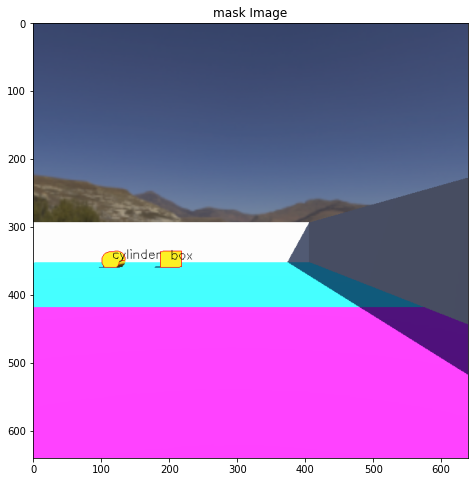

3298.5


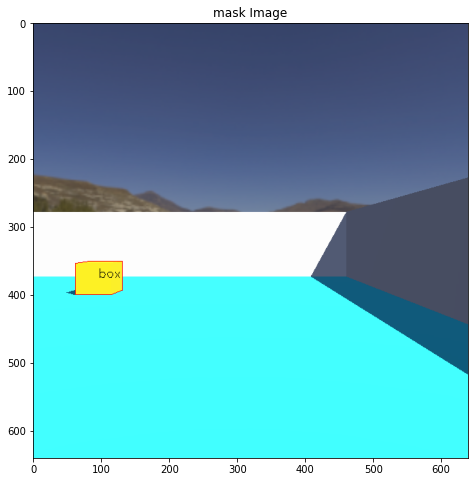

2841.5
1756.5


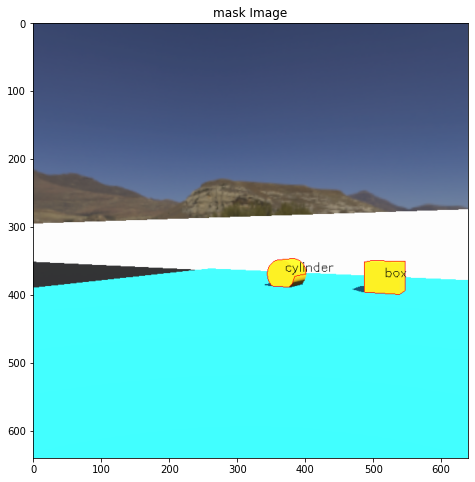

975.5
671.0


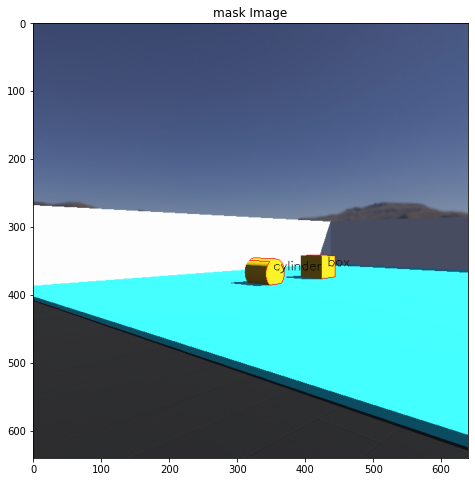

116541.0
267.5
216.0
0.0


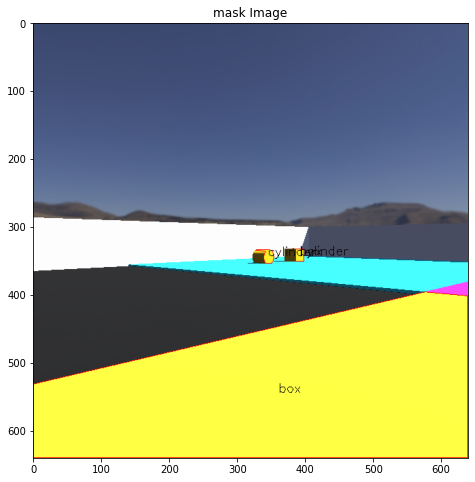

314.0
156.5


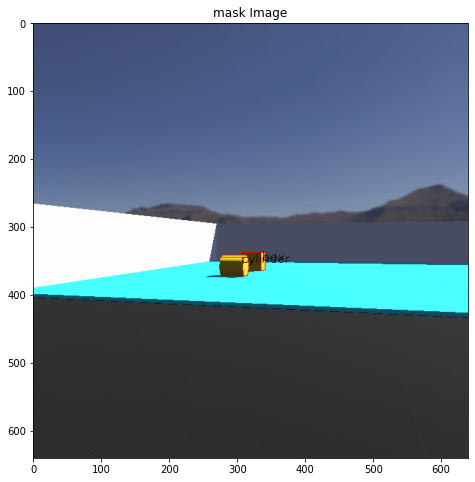

1590.5
1053.5


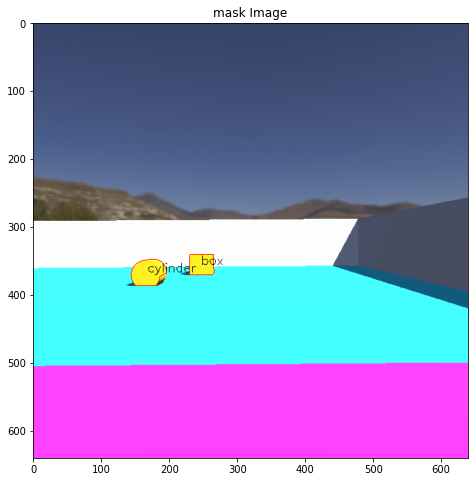

In [8]:
for image_name in range(3,10):
    image = cv.imread(f"{image_name}.png")

    img_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    ## Gen lower mask (0-5) and upper mask (175-180) of RED
    mask = cv.inRange(img_hsv, (28,50,20), (35,255,255))

    croped = cv.bitwise_and(image, image, mask=mask)

    gray = cv.cvtColor(croped, cv.COLOR_BGR2GRAY)

    _, threshold = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

    # using a findContours() function
    contours, _ = cv.findContours(threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        print(cv.contourArea(contour)) 
        # here we are ignoring first counter because 
        # findcontour function detects whole image as shape
    #     if i == 0:
    #         i = 1
    #         continue

        # cv2.approxPloyDP() function to approximate the shape
        approx = cv.approxPolyDP(
            contour, 0.01 * cv.arcLength(contour, True), True)

        # using drawContours() function
        cv.drawContours(image, [contour], 0, (0, 0, 255), 1)

        # finding center point of shape
        M = cv.moments(contour)
        if M['m00'] != 0.0:
            x = int(M['m10']/M['m00'])
            y = int(M['m01']/M['m00'])

        # putting shape name at center of each shape
        if  3 <= len(approx) <=6:
            cv.putText(image, 'box', (x, y),
                        cv.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)

        else:
            cv.putText(image, 'cylinder', (x, y),
                        cv.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)

    
    _, ax = plt.subplots(figsize=(8,8))
    ax.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    ax.set_title('mask Image')
    plt.show()